In [1]:
# pip install -q kaggle

In [1]:
# from google.colab import files
# files.upload()

In [3]:
# !mkdir ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Dataset Link
# https://www.kaggle.com/dhruvildave/english-handwritten-characters-dataset

In [4]:
# !kaggle datasets download -d dhruvildave/english-handwritten-characters-dataset

 69% 9.00M/13.1M [00:00<00:00, 92.6MB/s]
100% 13.1M/13.1M [00:00<00:00, 83.3MB/s]


In [5]:
# !unzip english-handwritten-characters-dataset.zip

Archive:  english-handwritten-characters-dataset.zip
  inflating: Img/img001-001.png      
  inflating: Img/img001-002.png      
  inflating: Img/img001-003.png      
  inflating: Img/img001-004.png      
  inflating: Img/img001-005.png      
  inflating: Img/img001-006.png      
  inflating: Img/img001-007.png      
  inflating: Img/img001-008.png      
  inflating: Img/img001-009.png      
  inflating: Img/img001-010.png      
  inflating: Img/img001-011.png      
  inflating: Img/img001-012.png      
  inflating: Img/img001-013.png      
  inflating: Img/img001-014.png      
  inflating: Img/img001-015.png      
  inflating: Img/img001-016.png      
  inflating: Img/img001-017.png      
  inflating: Img/img001-018.png      
  inflating: Img/img001-019.png      
  inflating: Img/img001-020.png      
  inflating: Img/img001-021.png      
  inflating: Img/img001-022.png      
  inflating: Img/img001-023.png      
  inflating: Img/img001-024.png      
  inflating: Img/img001-025.png    

In [6]:
import numpy as np
import pandas as pd
import random
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.image as img
import matplotlib.pyplot as plt

In [7]:
random.seed(0)

train_data = pd.read_csv('english.csv')
rand = random.sample(range(len(train_data)), round(len(train_data)*0.30))                 #Using 30 percent of data as validation data and Test Date (70/15/15 Split)
val_data = pd.DataFrame(train_data.iloc[rand, :].values, columns=['image', 'label'])      #Creating Validation Dataframe

train_data.drop(rand, inplace=True)                                                       #Remove the validation data from the main data

rand = random.sample(range(len(val_data)), round(len(val_data)*0.50))                     #Using 10 percent of data as validation data
test_data = pd.DataFrame(val_data.iloc[rand, :].values, columns=['image', 'label'])       #Creating Test Dataframe

val_data.drop(rand, inplace=True)                                                         #Remove the Test data from the main data

print(val_data)
print(test_data)

                   image label
0     Img/img029-038.png     S
2     Img/img032-018.png     V
4     Img/img020-016.png     J
5     Img/img039-005.png     c
7     Img/img031-009.png     U
...                  ...   ...
1017  Img/img049-036.png     m
1018  Img/img011-026.png     A
1019  Img/img005-041.png     4
1021  Img/img017-030.png     G
1022  Img/img056-022.png     t

[511 rows x 2 columns]
                  image label
0    Img/img028-036.png     R
1    Img/img055-021.png     s
2    Img/img060-009.png     x
3    Img/img055-036.png     s
4    Img/img016-038.png     F
..                  ...   ...
507  Img/img036-014.png     Z
508  Img/img054-013.png     r
509  Img/img040-037.png     d
510  Img/img022-043.png     L
511  Img/img032-028.png     V

[512 rows x 2 columns]


In [8]:
train_data_generator = ImageDataGenerator(rescale=1/255, shear_range=0.2, zoom_range=0.2)
data_generator = ImageDataGenerator(rescale=1/255)

train_df = train_data_generator.flow_from_dataframe(dataframe=train_data, x_col='image', y_col='label', 
                                                               target_size=(128, 128), class_mode='categorical')
val_df = data_generator.flow_from_dataframe(dataframe=val_data, x_col='image', y_col='label', 
                                                           target_size=(128, 128), class_mode='categorical')
test_df = data_generator.flow_from_dataframe(dataframe=test_data, x_col='image', y_col='label', 
                                                     target_size=(128, 128), class_mode='categorical', shuffle=False)

Found 2387 validated image filenames belonging to 62 classes.
Found 511 validated image filenames belonging to 62 classes.
Found 512 validated image filenames belonging to 62 classes.


In [9]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=60, kernel_size=3, activation='relu', input_shape=[128, 128, 3]),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
    tf.keras.layers.Conv2D(filters=60, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
    tf.keras.layers.Conv2D(filters=30, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
    tf.keras.layers.Conv2D(filters=30, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
    tf.keras.layers.Conv2D(filters=30, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=500, activation='relu'),
    tf.keras.layers.Dense(units=62, activation='sigmoid'),
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model_history = model.fit(x=train_df, validation_data=val_df, epochs=25)

Epoch 1/25
75/75 [==============================] - 60s 639ms/step - loss: 4.1286 - accuracy: 0.0151 - val_loss: 4.1128 - val_accuracy: 0.0215
Epoch 2/25
75/75 [==============================] - 49s 651ms/step - loss: 3.4798 - accuracy: 0.1324 - val_loss: 3.0870 - val_accuracy: 0.1644
Epoch 3/25
75/75 [==============================] - 48s 637ms/step - loss: 2.5864 - accuracy: 0.2824 - val_loss: 2.2288 - val_accuracy: 0.4110
Epoch 4/25
75/75 [==============================] - 47s 633ms/step - loss: 1.9467 - accuracy: 0.4537 - val_loss: 1.7910 - val_accuracy: 0.5147
Epoch 5/25
75/75 [==============================] - 48s 639ms/step - loss: 1.4069 - accuracy: 0.5886 - val_loss: 1.4255 - val_accuracy: 0.6164
Epoch 6/25
75/75 [==============================] - 48s 645ms/step - loss: 1.0816 - accuracy: 0.6757 - val_loss: 1.1925 - val_accuracy: 0.6888
Epoch 7/25
75/75 [==============================] - 48s 635ms/step - loss: 0.8593 - accuracy: 0.7248 - val_loss: 1.2350 - val_accuracy: 0.6791

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 60)      1680      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 60)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 60)        32460     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 60)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 30)        16230     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 30)       0

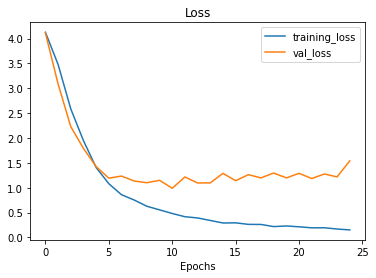

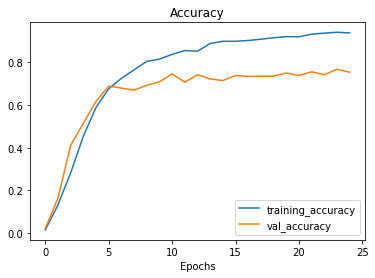

In [11]:
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

accuracy = model_history.history['accuracy']
val_accuracy = model_history.history['val_accuracy']

epochs = range(len(model_history.history['loss']))

#Plot loss
plt.plot(epochs, loss, label='training_loss')
plt.plot(epochs, val_loss, label='val_loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.legend()

#Plot accuracy
plt.figure()
plt.plot(epochs, accuracy, label='training_accuracy')
plt.plot(epochs, val_accuracy, label='val_accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.legend()

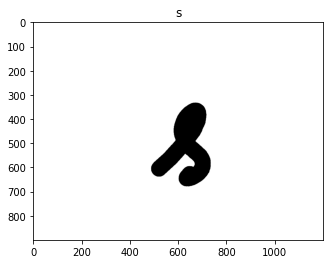

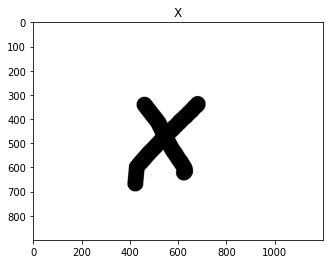

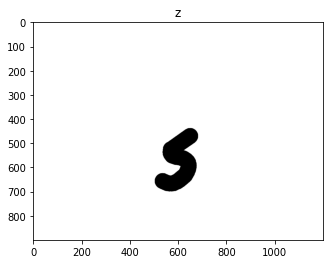

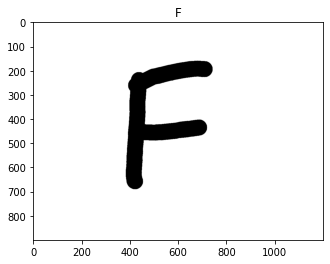

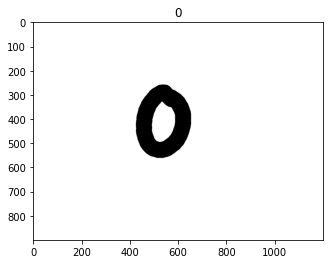

In [26]:
pred = model.predict(test_df)

#Dictionary that maps prediction to character
map_dict = {0: "0", 1: "1", 2: "2", 3: "3", 4: "4", 5: "5", 6: "6", 7: "7", 8: "8", 9: "9", 10: "A",
            11: "B", 12: "C", 13: "D", 14: "E", 15: "F", 16: "G", 17: "H", 18: "I", 19: "J", 20: "K",
            21: "L", 22: "M", 23: "N", 24: "O", 25: "P", 26: "Q", 27: "R", 28: "S", 29: "T", 30: "U",
            31: "V", 32: "W", 33: "X", 34: "Y", 35: "Z", 36: "a", 37: "b", 38: "c", 39: "d", 40: "e",
            41: "f", 42: "g", 43: "h", 44: "i", 45: "j", 46: "k", 47: "l", 48: "m", 49: "n", 50: "o",
            51: "p", 52: "q", 53: "r", 54: "s", 55: "t", 56: "u", 57: "v", 58: "w", 59: "x", 60: "y",
            61: "z"}

df_out = pd.DataFrame(pred)
maxIndex = list(df_out.idxmax(axis=1))

for i in range(1, 6):
    image = img.imread(test_data.at[i, 'image'])
    plt.title(map_dict.get(maxIndex[i], "error"))
    plt.imshow(image)
    plt.show()

In [29]:
# model.save('OCR_Dataset1_Custom.h5')